In [3]:
# %load ../start.py
# Load useful extensions

# Activate the autoreload extension for easy reloading of external packages
%reload_ext autoreload
%autoreload 2

# Trun on the water mark
%reload_ext watermark
%watermark -u -d -g

# Load ipycache extension
%reload_ext ipycache
from ipycache import CacheMagics
CacheMagics.cachedir = '../cachedir'

# Add project library to path
import sys
sys.path.insert(0, '../../lib/python')

# The usual suspects
import os
import numpy as np
import pandas as pd

# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_context('poster')

# Turn off scientific notation
np.set_printoptions(precision=5, suppress=True)


last updated: 2017-05-02 
Git hash: d40ee230d57b6ca21eb5f009ae3fbbe19e777d8b


In [8]:
df = pd.read_table('../../output/alignment/atropos_se_counts.tsv')
df.set_index(['sample', 'adapter', 'length'], inplace=True)

In [9]:
df.head()

count    expect  max.err error counts
sample     adapter       length                                        
SRR1543199 Adapter polyT 3       433548  391680.4        0       433548
                         4       156405   97920.1        0       156405
                         5        62160   24480.0        0        62160
                         6        25215    6120.0        0        25215
                         7        16578    1530.0        0        16578

In [12]:
dfSbs = df['count'].unstack(level=0)

In [15]:
dfSbs.fillna(0, inplace=True)
dfSbs

sample                   ERR489286  ERR489288  ERR489289  SRR1164383  \
adapter          length                                                
Adapter illumina 3        148294.0   283518.0   203491.0     68464.0   
                 4         45066.0    85376.0    61445.0     16091.0   
                 5         16362.0    32460.0    22034.0      6623.0   
                 6          3843.0     7711.0     5349.0      2572.0   
                 7           957.0     1978.0     1528.0      1865.0   
                 8           234.0      504.0      368.0      1467.0   
                 9           352.0      702.0      510.0      1457.0   
                 10          529.0     1186.0      756.0      1346.0   
                 11          192.0      396.0      300.0      1782.0   
                 12           74.0      198.0      132.0      1198.0   
                 13           61.0      136.0      129.0      1131.0   
                 14           50.0      110.0       64.0      1149.0   
                 15           46.0      113.0       79.0      1145.0   
                 16           52.0      112.0       75.0      1084.0   
                 17           40.0      121.0       85.0      1044.0   
                 18           44.0      108.0       84.0      1056.0   
                 19           25.0       70.0       44.0       831.0   
                 20           33.0       48.0       46.0       873.0   
                 21           19.0       52.0       45.0       789.0   
                 22           18.0       60.0       31.0       767.0   
                 23           32.0       40.0       45.0       773.0   
                 24           24.0       44.0       32.0       719.0   
                 25           16.0       35.0       34.0       786.0   
                 26           21.0       33.0       37.0       722.0   
                 27           28.0       57.0       25.0       701.0   
                 28           29.0       46.0       26.0       692.0   
                 29           24.0       46.0       36.0       642.0   
                 30           19.0       31.0       25.0       655.0   
                 31           73.0      141.0      131.0       477.0   
                 32           80.0      149.0      113.0       479.0   
...                            ...        ...        ...         ...   
Adapter polyT    72            0.0        0.0        0.0         0.0   
                 73            0.0        0.0        0.0         0.0   
                 74            0.0        0.0        0.0         1.0   
                 75            0.0        0.0        0.0         0.0   
                 76            0.0        0.0        0.0         0.0   
                 77            0.0        0.0        0.0         0.0   
                 78            0.0        0.0        0.0         0.0   
                 79            0.0        0.0        0.0         0.0   
                 80            0.0        0.0        0.0         1.0   
                 81            0.0        0.0        0.0         1.0   
                 82            0.0        0.0        0.0         0.0   
                 83            0.0        0.0        0.0         2.0   
                 84            0.0        0.0        0.0         0.0   
                 85            0.0        0.0        0.0         1.0   
                 86            0.0        0.0        0.0         0.0   
                 87            0.0        0.0        0.0         0.0   
                 88            0.0        0.0        0.0         0.0   
                 89            0.0        0.0        0.0         0.0   
                 90            0.0        0.0        0.0         0.0   
                 91            0.0        0.0        0.0         0.0   
                 92            0.0        0.0        0.0         0.0   
                 93            0.0        0.0        0.0         0.0   
                 94            0.0      

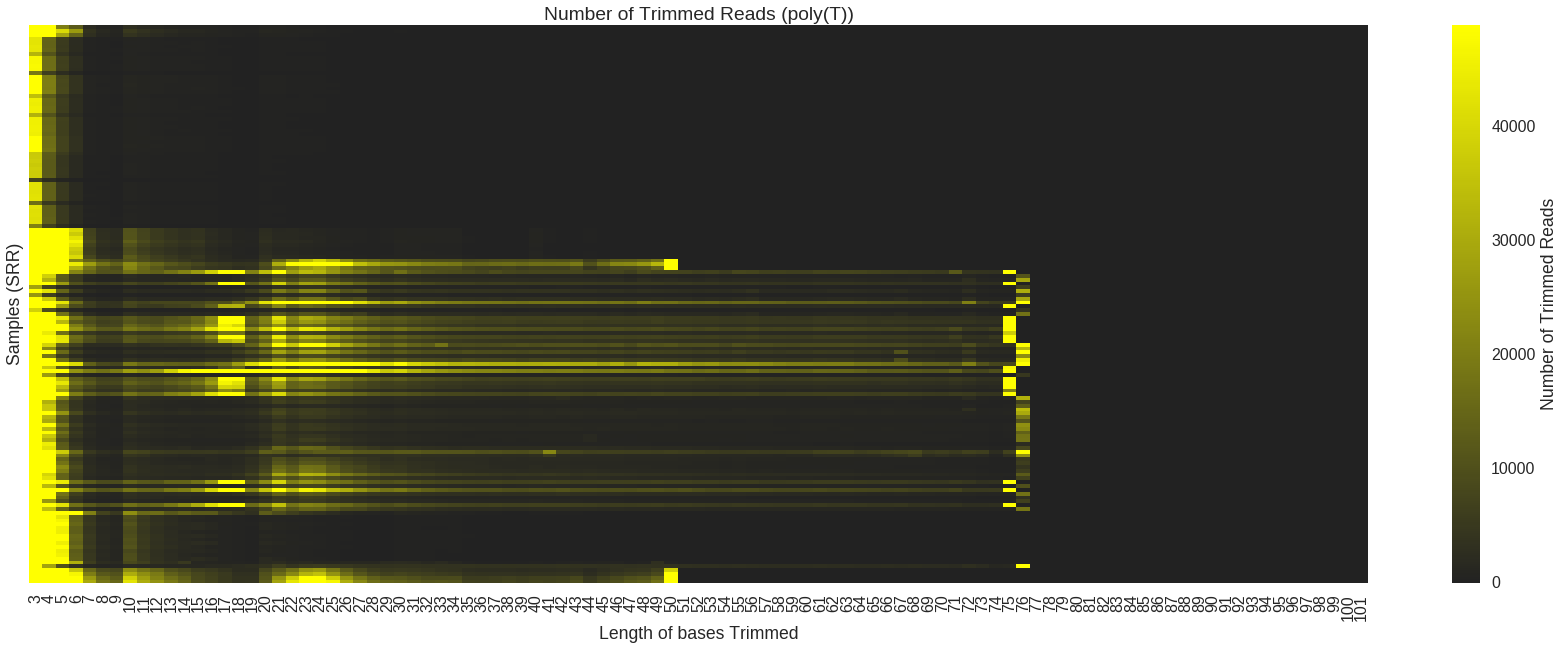

In [46]:
polyT = dfSbs.loc['Adapter polyT']
fig, ax = plt.subplots(1, 1, figsize=(30, 10))
sns.heatmap(polyT.T, xticklabels=True, yticklabels=False, cmap=sns.dark_palette('yellow', as_cmap=True), robust=True, ax=ax, cbar_kws={'label': 'Number of Trimmed Reads'})
ax.set_title('Number of Trimmed Reads (poly(T))')
ax.set_xlabel('Length of bases Trimmed');
ax.set_ylabel('Samples (SRR)');

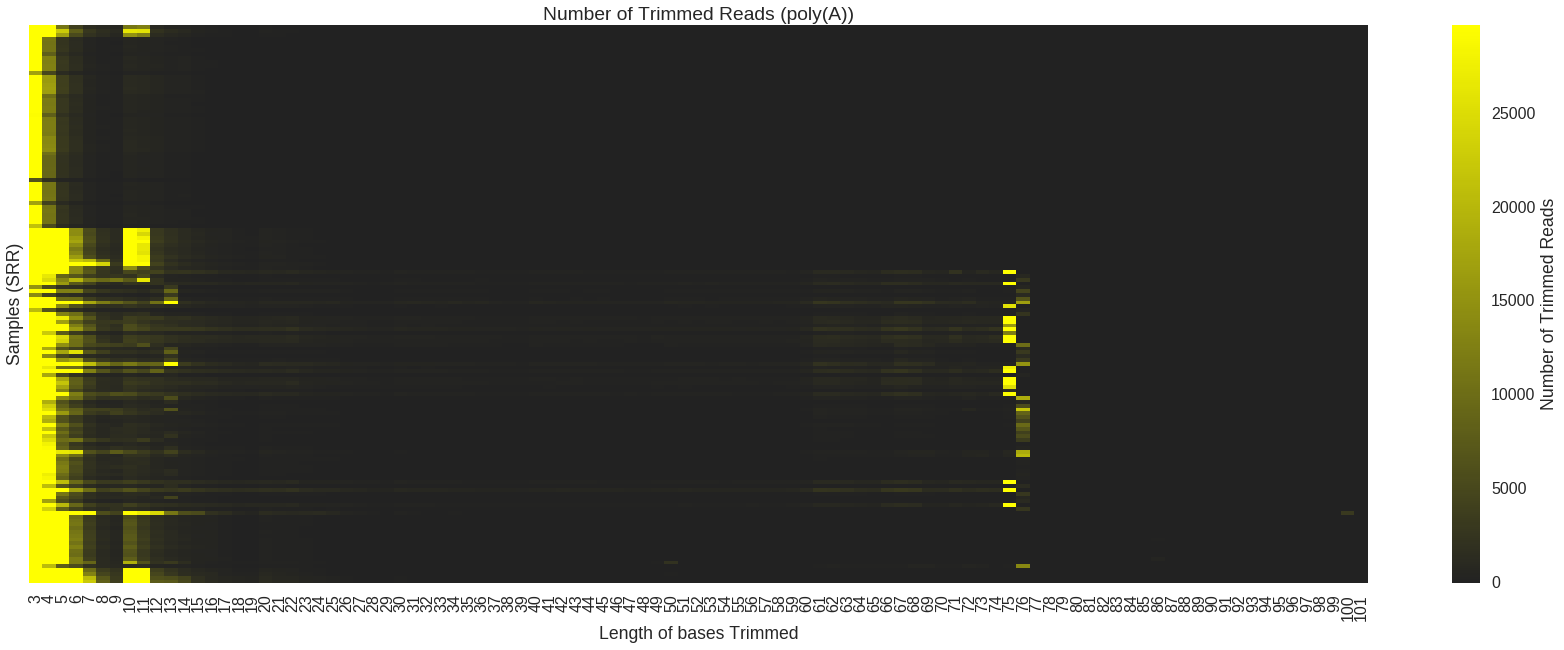

In [43]:
polyA = dfSbs.loc['Adapter polyA']
fig, ax = plt.subplots(1, 1, figsize=(30, 10))
sns.heatmap(polyA.T, xticklabels=True, yticklabels=False, cmap=sns.dark_palette('yellow', as_cmap=True), robust=True, ax=ax, cbar_kws={'label': 'Number of Trimmed Reads'})
ax.set_title('Number of Trimmed Reads (poly(A))')
ax.set_xlabel('Length of bases Trimmed');
ax.set_ylabel('Samples (SRR)');

In [51]:
polyT.iloc[8:].sum().sum()

35135803.0